# MLP Neural Network Visualization Demo

This notebook demonstrates the capabilities of our Multi-Layer Perceptron implementation with various datasets and visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

print("Libraries imported successfully!")

Libraries imported successfully!


## Utility Functions

In [2]:
def generate_spiral_data(n_samples=300, n_classes=3, random_state=42):
    np.random.seed(random_state)
    
    X = np.zeros((n_samples * n_classes, 2))
    y = np.zeros(n_samples * n_classes, dtype=int)
    
    for class_idx in range(n_classes):
        start_idx = class_idx * n_samples
        end_idx = (class_idx + 1) * n_samples
        
        r = np.linspace(0.1, 1, n_samples)
        t = np.linspace(class_idx * 4, (class_idx + 1) * 4, n_samples) + np.random.randn(n_samples) * 0.2
        
        X[start_idx:end_idx, 0] = r * np.sin(t)
        X[start_idx:end_idx, 1] = r * np.cos(t)
        y[start_idx:end_idx] = class_idx
    
    return X, y

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

print("Utility functions defined successfully!")

Utility functions defined successfully!


## 1. Binary Classification with Different Datasets

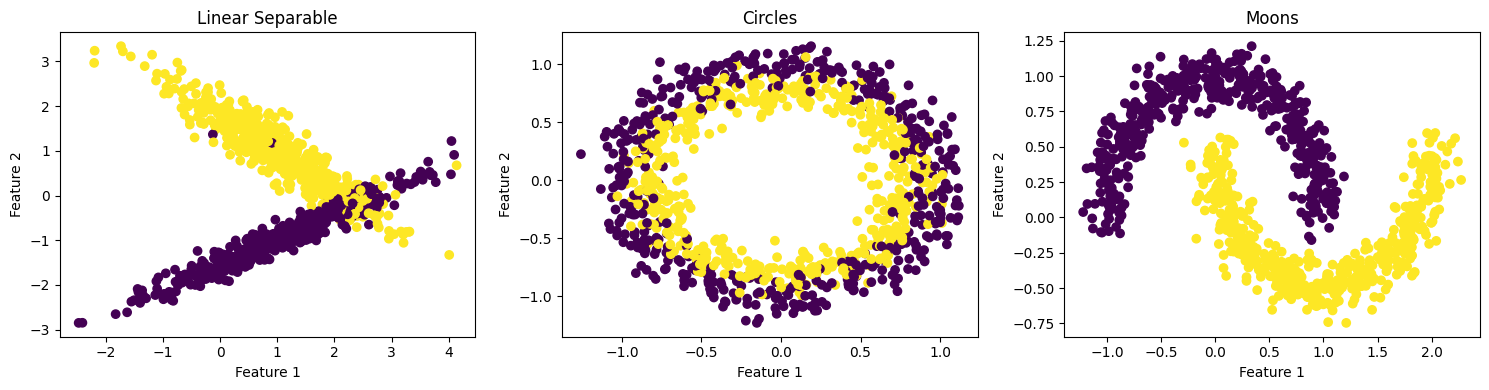

In [3]:
datasets = {
    'Linear Separable': make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                                          n_informative=2, n_clusters_per_class=1, random_state=42),
    'Circles': make_circles(n_samples=1000, noise=0.1, random_state=42),
    'Moons': make_moons(n_samples=1000, noise=0.1, random_state=42)
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (name, (X, y)) in enumerate(datasets.items()):
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    axes[i].set_title(name)
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

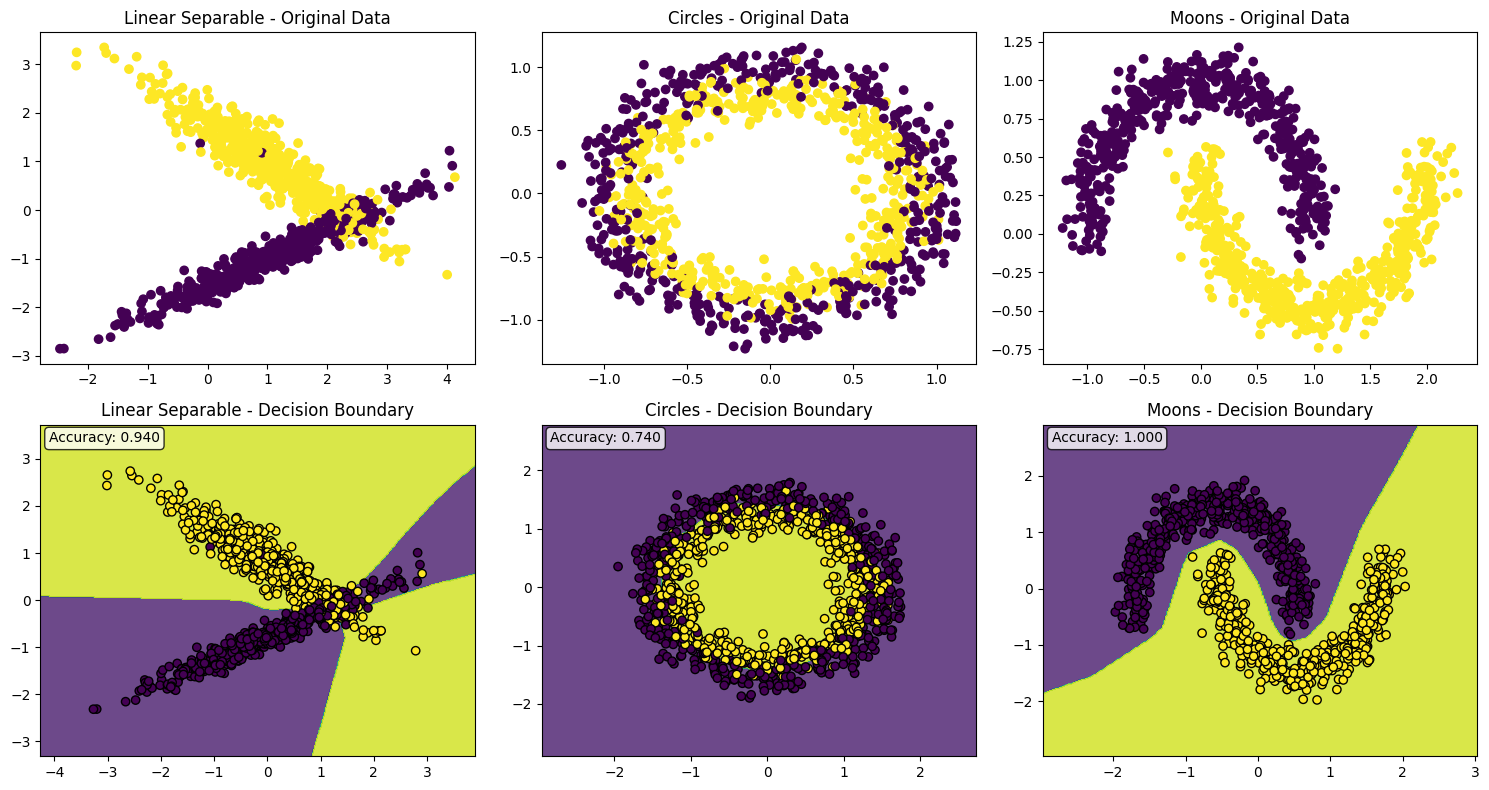

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, (name, (X, y)) in enumerate(datasets.items()):
    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_norm, y, test_size=0.3, random_state=42
    )
    
    mlp = MLPClassifier(
        hidden_layer_sizes=(20, 10),
        activation='relu',
        learning_rate_init=0.01,
        max_iter=1000,
        random_state=42
    )
    
    mlp.fit(X_train, y_train)
    
    axes[0, i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    axes[0, i].set_title(f'{name} - Original Data')
    
    h = 0.02
    x_min, x_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    y_min, y_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[1, i].contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    axes[1, i].scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap='viridis', edgecolors='black')
    axes[1, i].set_title(f'{name} - Decision Boundary')
    
    test_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, test_pred)
    axes[1, i].text(0.02, 0.98, f'Accuracy: {accuracy:.3f}', 
                   transform=axes[1, i].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 2. Multi-class Classification (Spiral Dataset)

Test Accuracy: 1.0000
Number of iterations: 47


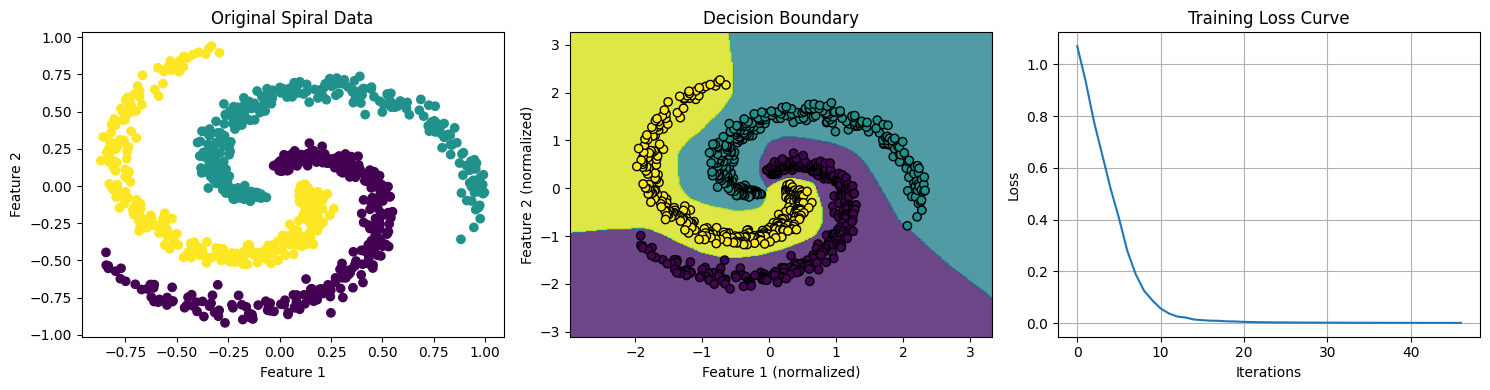

In [5]:
X_spiral, y_spiral = generate_spiral_data(n_samples=300, n_classes=3, random_state=42)

scaler = StandardScaler()
X_spiral_norm = scaler.fit_transform(X_spiral)

X_train, X_test, y_train, y_test = train_test_split(
    X_spiral_norm, y_spiral, test_size=0.3, random_state=42
)

mlp_spiral = MLPClassifier(
    hidden_layer_sizes=(50, 30, 20),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=2000,
    random_state=42
)

mlp_spiral.fit(X_train, y_train)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, cmap='viridis')
axes[0].set_title('Original Spiral Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

h = 0.02
x_min, x_max = X_spiral_norm[:, 0].min() - 1, X_spiral_norm[:, 0].max() + 1
y_min, y_max = X_spiral_norm[:, 1].min() - 1, X_spiral_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = mlp_spiral.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
axes[1].scatter(X_spiral_norm[:, 0], X_spiral_norm[:, 1], c=y_spiral, cmap='viridis', edgecolors='black')
axes[1].set_title('Decision Boundary')
axes[1].set_xlabel('Feature 1 (normalized)')
axes[1].set_ylabel('Feature 2 (normalized)')

axes[2].plot(mlp_spiral.loss_curve_)
axes[2].set_title('Training Loss Curve')
axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

test_pred = mlp_spiral.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Number of iterations: {mlp_spiral.n_iter_}")

plt.tight_layout()
plt.show()

## 3. Regression Example

Test MSE (normalized): 0.0494
Test RMSE (normalized): 0.2222
Number of iterations: 97


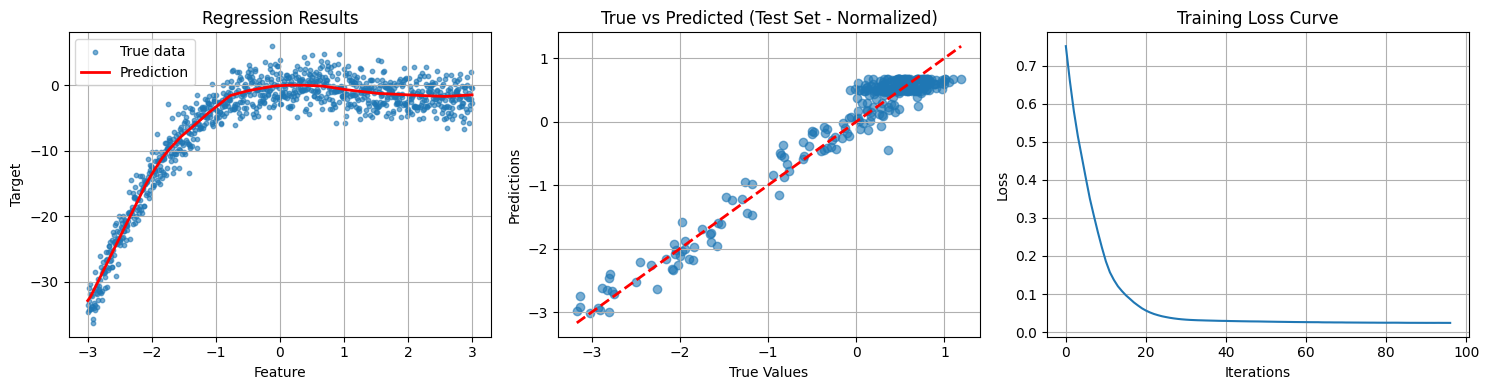

In [6]:
np.random.seed(42)
X_reg = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_reg = 0.5 * X_reg.flatten() ** 3 - 2 * X_reg.flatten() ** 2 + X_reg.flatten() + np.random.normal(0, 2, 1000)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_reg_norm = scaler_X.fit_transform(X_reg)
y_reg_norm = scaler_y.fit_transform(y_reg.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(
    X_reg_norm, y_reg_norm, test_size=0.3, random_state=42
)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(50, 30, 10),
    activation='relu',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42
)

mlp_reg.fit(X_train, y_train)

train_pred = mlp_reg.predict(X_train)
test_pred = mlp_reg.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sort_idx = np.argsort(X_reg.flatten())
X_sorted = X_reg[sort_idx]
y_sorted = y_reg[sort_idx]

X_sorted_norm = scaler_X.transform(X_sorted)
y_pred_sorted = mlp_reg.predict(X_sorted_norm)
y_pred_sorted_rescaled = scaler_y.inverse_transform(y_pred_sorted.reshape(-1, 1)).flatten()

axes[0].scatter(X_reg, y_reg, alpha=0.6, s=10, label='True data')
axes[0].plot(X_sorted, y_pred_sorted_rescaled, 'r-', linewidth=2, label='Prediction')
axes[0].set_title('Regression Results')
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Target')
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(y_test, test_pred, alpha=0.6)
min_val = min(y_test.min(), test_pred.min())
max_val = max(y_test.max(), test_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[1].set_title('True vs Predicted (Test Set - Normalized)')
axes[1].set_xlabel('True Values')
axes[1].set_ylabel('Predictions')
axes[1].grid(True)

axes[2].plot(mlp_reg.loss_curve_)
axes[2].set_title('Training Loss Curve')
axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
print(f"Test MSE (normalized): {test_mse:.4f}")
print(f"Test RMSE (normalized): {test_rmse:.4f}")
print(f"Number of iterations: {mlp_reg.n_iter_}")

plt.tight_layout()
plt.show()

## 4. Comparison of Different Activation Functions

Activation Function Comparison Results:
LOGISTIC: 1.0000
RELU: 1.0000
TANH: 1.0000


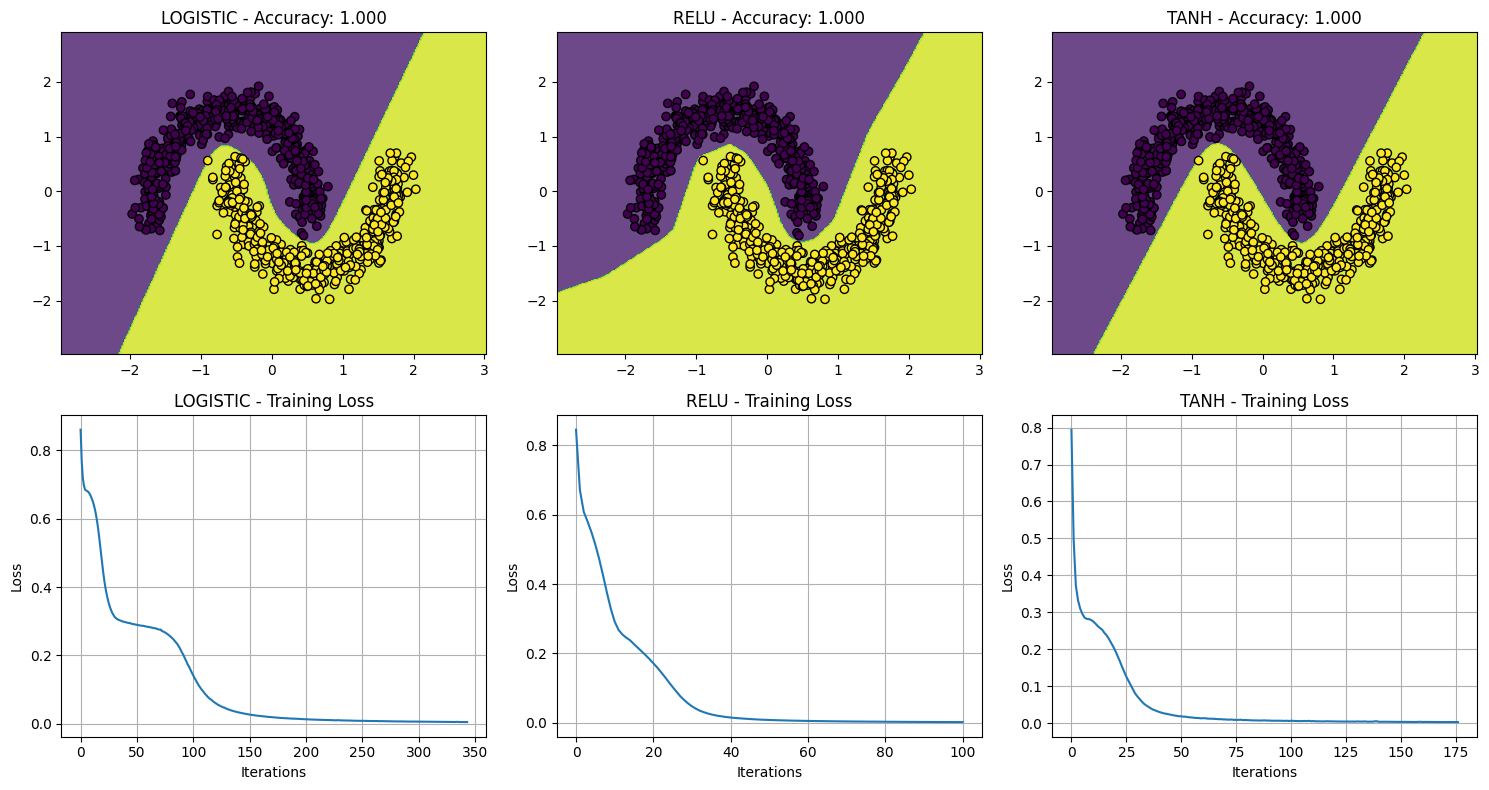

In [7]:
X_comp, y_comp = make_moons(n_samples=1000, noise=0.1, random_state=42)
scaler = StandardScaler()
X_comp_norm = scaler.fit_transform(X_comp)

X_train, X_test, y_train, y_test = train_test_split(
    X_comp_norm, y_comp, test_size=0.3, random_state=42
)

activations = ['logistic', 'relu', 'tanh']  # sklearn uses 'logistic' instead of 'sigmoid'
results = {}

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, activation in enumerate(activations):
    # Create and train MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=(20, 10),
        activation=activation,
        learning_rate_init=0.01,
        max_iter=1000,
        random_state=42
    )
    
    mlp.fit(X_train, y_train)
    
    test_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, test_pred)
    results[activation] = accuracy
    
    h = 0.02
    x_min, x_max = X_comp_norm[:, 0].min() - 1, X_comp_norm[:, 0].max() + 1
    y_min, y_max = X_comp_norm[:, 1].min() - 1, X_comp_norm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[0, i].contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    axes[0, i].scatter(X_comp_norm[:, 0], X_comp_norm[:, 1], c=y_comp, cmap='viridis', edgecolors='black')
    axes[0, i].set_title(f'{activation.upper()} - Accuracy: {accuracy:.3f}')
    
    axes[1, i].plot(mlp.loss_curve_)
    axes[1, i].set_title(f'{activation.upper()} - Training Loss')
    axes[1, i].set_xlabel('Iterations')
    axes[1, i].set_ylabel('Loss')
    axes[1, i].grid(True)

print("Activation Function Comparison Results:")
for activation, accuracy in results.items():
    print(f"{activation.upper()}: {accuracy:.4f}")

plt.tight_layout()
plt.show()

## 5. Summary and Conclusions

In [8]:
print("=" * 60)
print("MLP NEURAL NETWORK DEMONSTRATION SUMMARY")
print("=" * 60)
print()
print("This notebook demonstrated:")
print("1. Binary classification on linearly separable and non-linear datasets")
print("2. Multi-class classification on spiral data")
print("3. Regression on polynomial data with noise")
print("4. Comparison of different activation functions")
print()
print("Key observations:")
print("- ReLU activation often performs well for most tasks")
print("- Deeper networks can capture more complex patterns")
print("- Proper data normalization is crucial for convergence")
print("- MLPs can learn non-linear decision boundaries effectively")
print()
print("Next steps could include:")
print("- Hyperparameter tuning (learning rate, architecture)")
print("- Regularization techniques (dropout, L1/L2)")
print("- Cross-validation for model selection")
print("- Comparison with other ML algorithms")

MLP NEURAL NETWORK DEMONSTRATION SUMMARY

This notebook demonstrated:
1. Binary classification on linearly separable and non-linear datasets
2. Multi-class classification on spiral data
3. Regression on polynomial data with noise
4. Comparison of different activation functions

Key observations:
- ReLU activation often performs well for most tasks
- Deeper networks can capture more complex patterns
- Proper data normalization is crucial for convergence
- MLPs can learn non-linear decision boundaries effectively

Next steps could include:
- Hyperparameter tuning (learning rate, architecture)
- Regularization techniques (dropout, L1/L2)
- Cross-validation for model selection
- Comparison with other ML algorithms
